<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Arboldedecision_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales
* Héctor Salvador Montañez Alvarez
* Jaime Andres Palacios Campaña

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

#**Ejercicio-1.** 

##Carga de datos

In [3]:

#Cargamos la base de datos con los nombres de las columnnas traducidos a Inglés
#Este archivo se encuentra en nuestro repositorio github público:
#https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/SouthGermanCredit_Traducida.csv

datos = pd.read_csv("https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/SouthGermanCredit_Traducida.csv", sep=",")
datos.describe()

,estado,duracion,historia_credito,proposito,cantidad,ahorros,tiempo_empleo,rata,estado_civil,otras_deudas,...,propiedades,edad,otros_creditos,vivienda,numero_creditos,trabajo,numero_deudores,telefono,extranjero,credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


#**Ejercicio-2.**

##Creación de la estructuras de datos de entrenamiento (_train) y prueba (_test)


In [4]:

#Los datos de entrada son todas las columnas excepto la última
X = datos.iloc[:,:-1]
#La variable de salida se encuentra en la última columna 
Y = datos.iloc[:,-1]      

#Usamos la función train_test_split de la libreria sklearn
#Fijamos el generador de números aleatorios con el fin de que los conjuntos
#no cambien en cada corrida
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45)

#Chequeamos el tamaño de los conjuntos obtenidos
print(X_train.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(X_test.shape, ': dimensión de datos de entrada de prueba')  
print(Y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(Y_test.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada de entrenamiento y validación
(150, 20) : dimensión de datos de entrada de prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


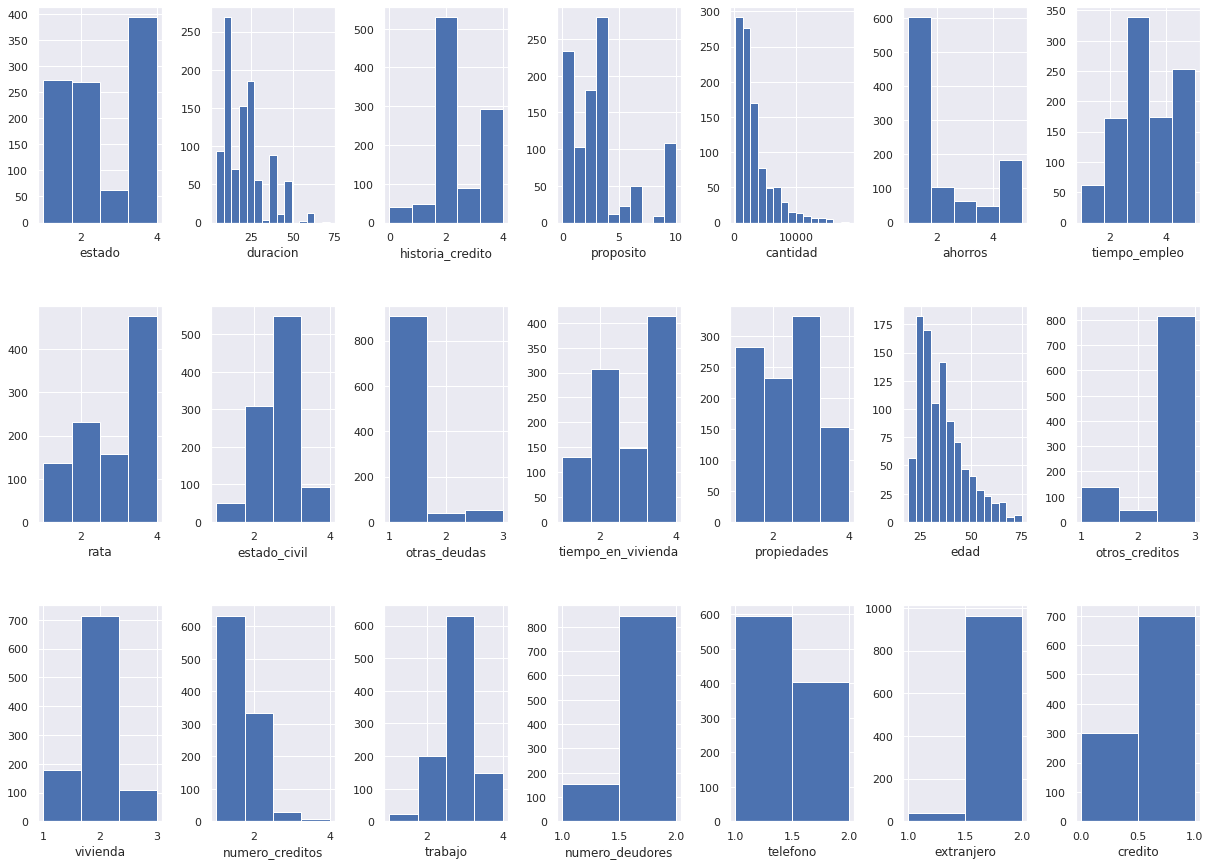

In [5]:
# En esta sección creamos los histogramas sin transformaciones
# para darnos una idea de las distribuciones

# Tamaño de la gráfica
sns.set(rc={'figure.figsize':(17,12)})
# Crea el espacio de trabajo como una matriz de 3 x 7 = 21 variables
fig, axes = plt.subplots(3, 7)
# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)   

# Grafica los histogramas uno por uno
for k in range(0,21):       
    # Posición sequencial. Van de 1 a 21 en este caso (no 0)
    plt.subplot(3,7,k+1)
    # Número de valores diferentes.
    buckets = datos.iloc[:,k].nunique()
    # Si el número de valores es mayor de 10, declara el número de buckets como 15
    # si es <=10 usa ese número de buckets
    if buckets > 10:
        buckets = 15
    # Crea el histograma
    datos.iloc[:,k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 21 gráficas    
plt.show()

#**Ejercicio-3.**
##Primera approximación
##Transformaciones:
* categórica (categorical),
* ordinal (discretized quantitative),
* numérica (quantitative), y 
* binaria (binary).


In [ ]:
None

#**Ejercicio-4.**
##Entrenamiento usando validación cruzada
##Modelos:
* Regresión Logística, 
* Árbol de Decisión, y 
* Bosque Aleatorio.


In [ ]:
None

#**Ejercicio-5.**
#Mejoramiento de los hiperparámetros y sobreentrenamiento



In [ ]:
None

#**Ejercicio-6.**
#Obtención de los modelos finales


In [ ]:
None

#**Bibliografía**

Sadangi, S., (21 de Julio de 2022). How to Deal With Files in Google Colab: Everything You Need to Know. *Neptune Labs.* https://neptune.ai/blog/google-colab-dealing-with-files

###**Fin de la Actividad de la semana 6.**